In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Simulated demographic dataset
data = {
    'Age': [25, 32, 40, 28, 45, 50, 22, 36, 30, 48],
    'Education': ['Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'High School', 'Masters', 'Bachelors', 'PhD'],
    'Occupation': ['Engineer', 'Scientist', 'Professor', 'Engineer', 'Scientist', 'Professor', 'Technician', 'Scientist', 'Technician', 'Professor'],
    'HoursPerWeek': [40, 50, 45, 42, 55, 60, 38, 48, 40, 52],
    'Income': [55000, 72000, 95000, 58000, 80000, 98000, 40000, 76000, 47000, 97000]
}

df = pd.DataFrame(data)

In [3]:
# Encode categorical variables
le_edu = LabelEncoder()
le_occ = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])
df['Occupation'] = le_occ.fit_transform(df['Occupation'])


In [4]:
# Features and target
X = df.drop('Income', axis=1)
y = df['Income']


In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [7]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print("Predicted Incomes:", np.round(y_pred, 2))
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))


Predicted Incomes: [ 11049.93  88497.1  117103.6 ]
Mean Squared Error: 643169720.91
R² Score: -0.48


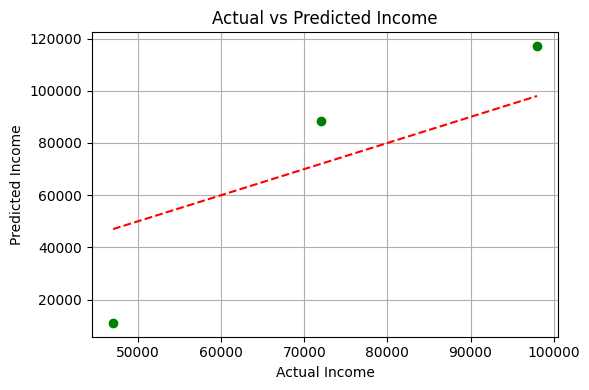

In [10]:
# Visualize actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title("Actual vs Predicted Income")
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.grid(True)
plt.tight_layout()
plt.show()